<h1> Part 1 ‑ Exploratory data analysis on Logins </h1>

Logins.json file contains (simulated) timestamps of user logins in a particular geographic location.  Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 

In [153]:
import pandas as pd
import json
import seaborn as sns
import datetime
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

<h2> Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. </h2>


Lets Import the file 

In [100]:
logins = pd.read_json('logins.json')
print('Logins has {} rows ,and {} colunms'.format(logins.shape[0],logins.shape[1]))

Logins has 93142 rows ,and 1 colunms


In [101]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There are no non-null values of datetime64 object. In order to do perform time series we need to set the index as date time

In [102]:
logins = logins.set_index(logins.login_time)

In [103]:
logins =logins.rename(columns={'login_time': 'Value'})
logins.Value=1

In [104]:
logins.head()

,Value
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [107]:
samplePer15min= logins.resample('15T').sum()
samplePer15min.head()

,Value
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<h2>Let see some trend daily, weekly and montly Overall </h2>

In [110]:
daily = samplePer15min.resample('D').mean()
weekly = samplePer15min.resample('W').mean()
montly = samplePer15min.resample('M').mean()
yearly = samplePer15min.resample('Y').mean()

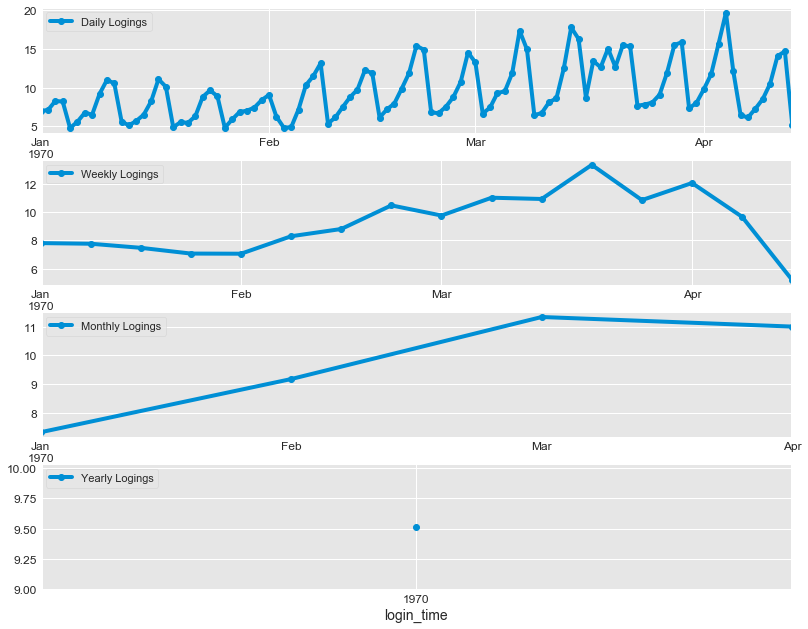

In [156]:
# Weekly trend
fig, ax = plt.subplots(4, sharex=False, figsize=(12,10))

daily.plot(ax=ax[0], style='-o')
weekly.plot(ax=ax[1], style='-o')
montly.plot(ax=ax[2], style='-o')
yearly.plot(ax=ax[3], style='-o')
ax[0].legend(['Daily Logings'])
ax[1].legend(['Weekly Logings'], loc='upper left')
ax[2].legend(['Monthly Logings'], loc='upper left')
ax[3].legend(['Yearly Logings'], loc='upper left')

There is an increasing trend from winter months to spring. What caused this is a unknown and very important for making a valid conclusion. Is it due to weather or something else? 

In the month of April or mid April there is rapid decrease in number of logins. This is also strange. 

<h2>Daily Activity Overall </h2>

In [117]:
days = samplePer15min.groupby(samplePer15min.index.dayofweek).mean()

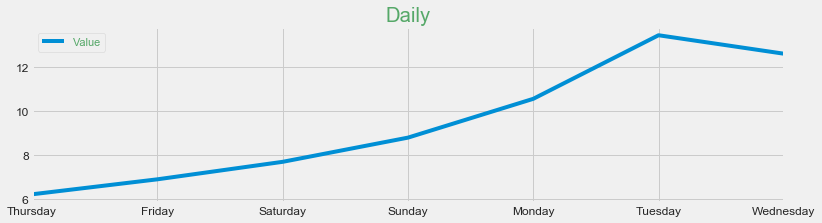

In [154]:
fig, ax = plt.subplots(figsize=(12,3))
days.index = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'] 
days.plot(ax=ax)
ax.set_title('Daily');

It seems like Tuesday is the most busiest day of all the times

<h2>Activity for Each Month </h2>

In [151]:
Jan = daily['1970-01-01':'1970-01-31']
Feb = daily['1970-02-01':'1970-02-28'].resample('6D')
March = daily['1970-03-01':'1970-03-30']
April = daily['1970-04-01':'1970-04-13']

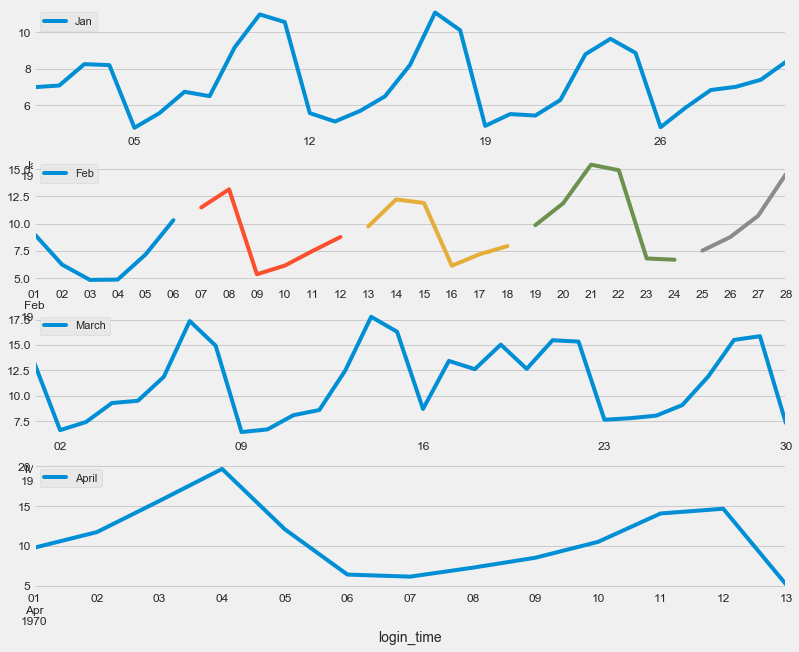

In [155]:
fig, ax = plt.subplots(4, figsize=(12,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


Jan.plot(ax=ax[0])
Feb.plot(ax=ax[1])
March.plot(ax=ax[2])
April.plot(ax=ax[3])

ax[0].legend(['Jan'], loc='upper left')
ax[1].legend(['Feb'], loc='upper left')
ax[2].legend(['March'], loc='upper left')
ax[3].legend(['April'], loc='upper left')

<h2>Using SARIMA</h2>

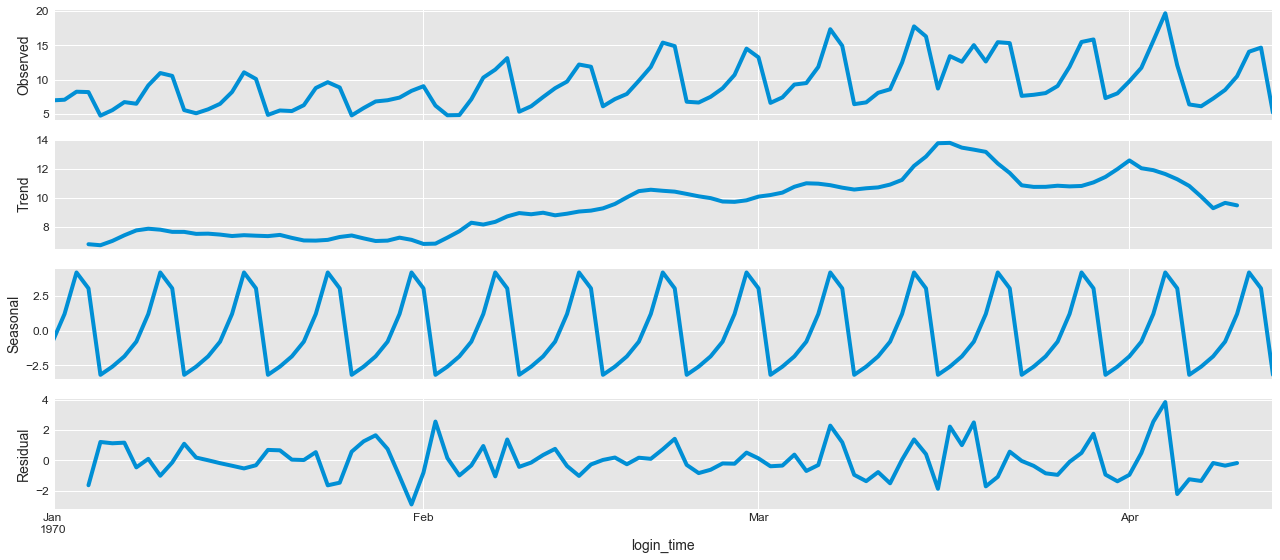

In [171]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(daily, model='additive')
fig = decomposition.plot()
plt.tight_layout()
plt.show()

Trend shows that there will be an increase in number of logins in the feature.

In [166]:
mod = sm.tsa.statespace.SARIMAX(daily,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7045      0.103      6.830      0.000       0.502       0.907
ar.S.L12      -0.0911      0.265     -0.344      0.731      -0.610       0.427
ma.S.L12      -0.6548      0.308     -2.127      0.033      -1.258      -0.051
sigma2        10.8835      1.947      5.589      0.000       7.067      14.700


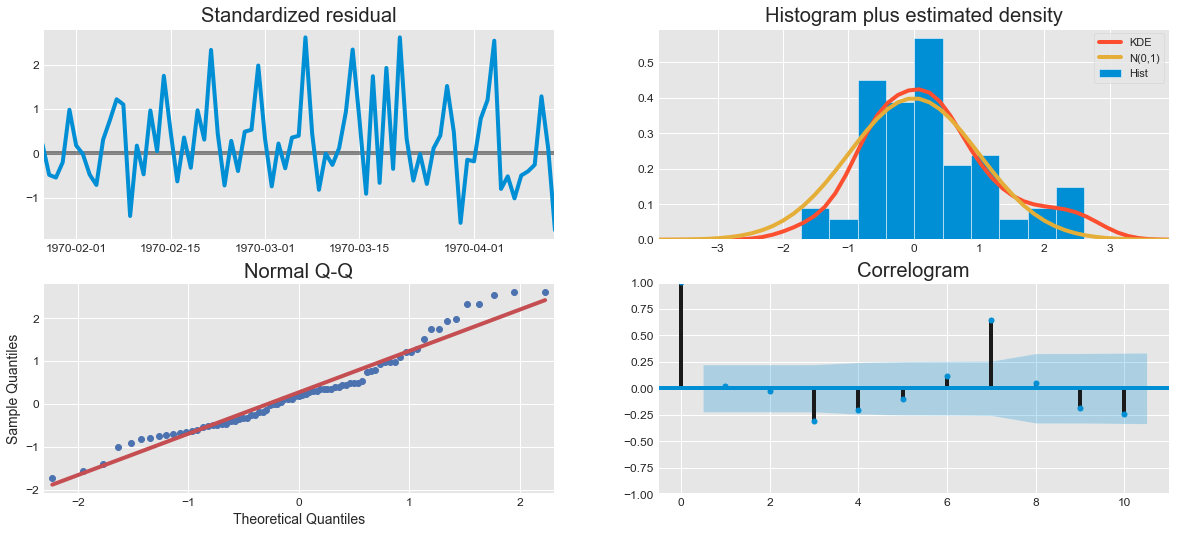

In [167]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

With the diagnostic above we can visualize important information as the distribution and the Auto correlation function ACF (correlogram). Values upward the “0” has some correlation over the time series data. Values near to “1” demonstrates strongest correlation.

<h1> Part 2 ‑ Exploratory data analysis on ultimate_data_challenge </h1>

In [266]:
with open('ultimate_data_challenge.json') as ultimate_data_challenge:
    data = json.load(ultimate_data_challenge)
df = pd.DataFrame(data)

logins = pd.read_json('logins.json')

In [267]:
print('Ultimate_data_challenge has {} rows ,and {} colunms'.format(df.shape[0],df.shape[1]))


Ultimate_data_challenge has 50000 rows ,and 12 colunms


In [268]:
print('Columns names in Ultimate_data_challenge are {}'.format(df.columns))

Columns names in Ultimate_data_challenge are Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')


In [269]:
#'General Information about Ultimate_data_challenge data set is below'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [270]:
df.shape[0]

50000

In [271]:
perct_missing_value = 100* df.isnull().sum()/df.shape[0]
perct_missing_value

avg_dist                   0.000
avg_rating_by_driver       0.402
avg_rating_of_driver      16.244
avg_surge                  0.000
city                       0.000
last_trip_date             0.000
phone                      0.792
signup_date                0.000
surge_pct                  0.000
trips_in_first_30_days     0.000
ultimate_black_user        0.000
weekday_pct                0.000
dtype: float64

<h1> Problem</h1>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

In [272]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


<h3> Date Time Analysis</h3>

In [273]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [274]:
df[['signup_date','last_trip_date'] ].head()

,signup_date,last_trip_date
0,2014-01-25,2014-06-17
1,2014-01-29,2014-05-05
2,2014-01-06,2014-01-07
3,2014-01-10,2014-06-29
4,2014-01-27,2014-03-15


In [297]:
active_in_6_moths = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were active_in_6_moths.'.format(active_in_6_moths*100))

36.65% of the observed users were active_in_6_moths.


In [276]:
active_in_6_moths.shape

(13, 12)

In [291]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.079493,0.028752,-0.081693,-0.104532,-0.136830,0.032939,0.102253
avg_rating_by_driver,0.079493,1.000000,0.101086,0.010710,0.020328,-0.038948,0.009276,0.020053
avg_rating_of_driver,0.028752,0.101086,1.000000,-0.021638,-0.003188,-0.011360,-0.002543,0.011987
avg_surge,-0.081693,0.010710,-0.021638,1.000000,0.793409,-0.001934,-0.077733,-0.110199
surge_pct,-0.104532,0.020328,-0.003188,0.793409,1.000000,0.005548,-0.105645,-0.145152
trips_in_first_30_days,-0.136830,-0.038948,-0.011360,-0.001934,0.005548,1.000000,0.112221,0.050791
ultimate_black_user,0.032939,0.009276,-0.002543,-0.077733,-0.105645,0.112221,1.000000,0.035878
weekday_pct,0.102253,0.020053,0.011987,-0.110199,-0.145152,0.050791,0.035878,1.000000


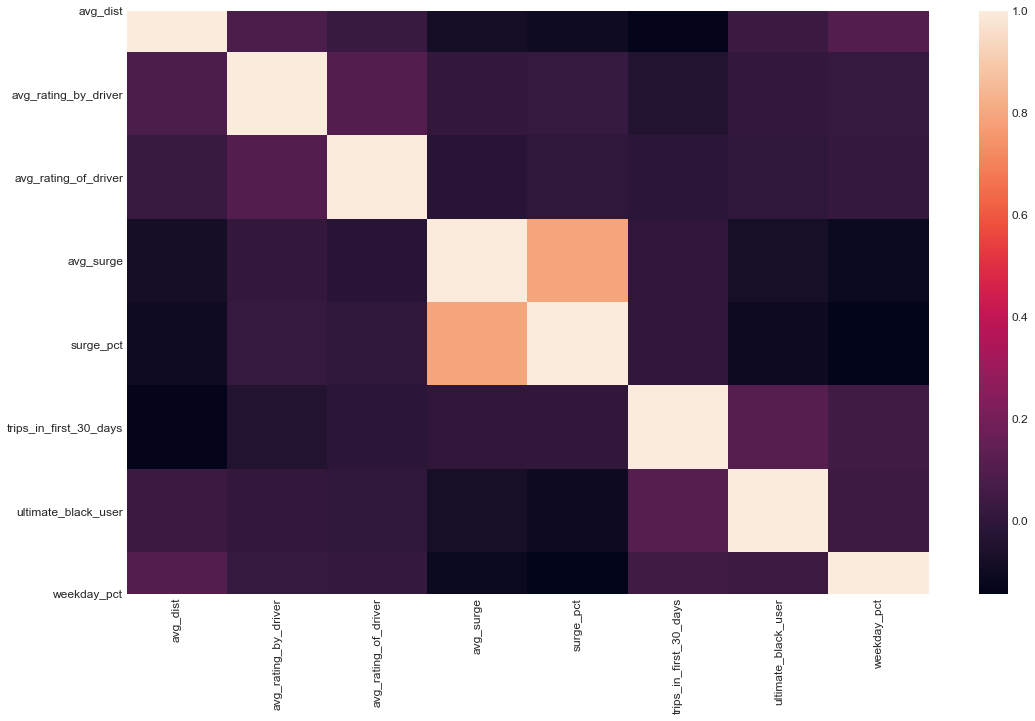

In [292]:
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

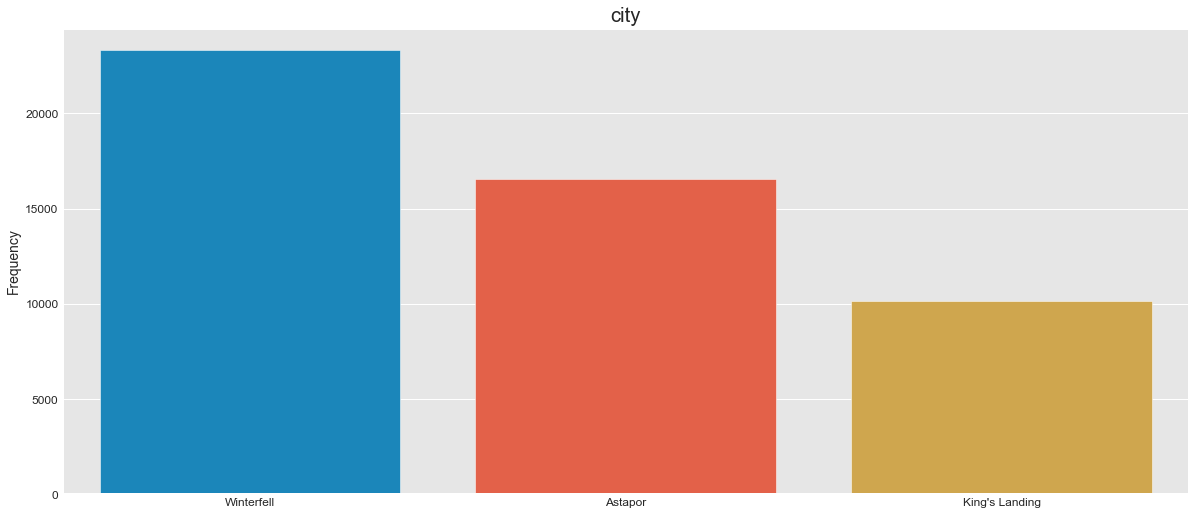

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


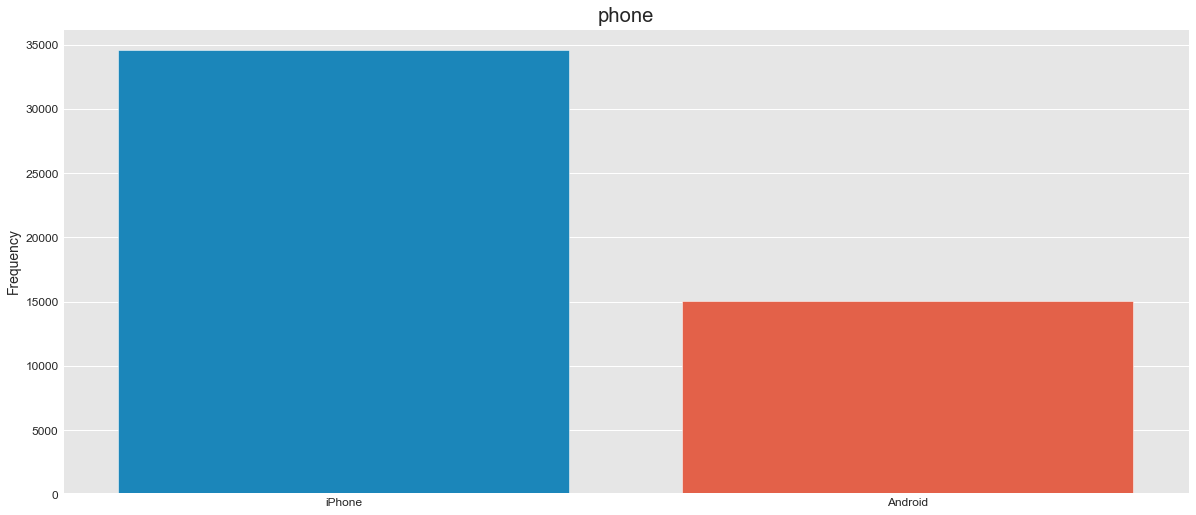

iPhone     34582
Android    15022
Name: phone, dtype: int64


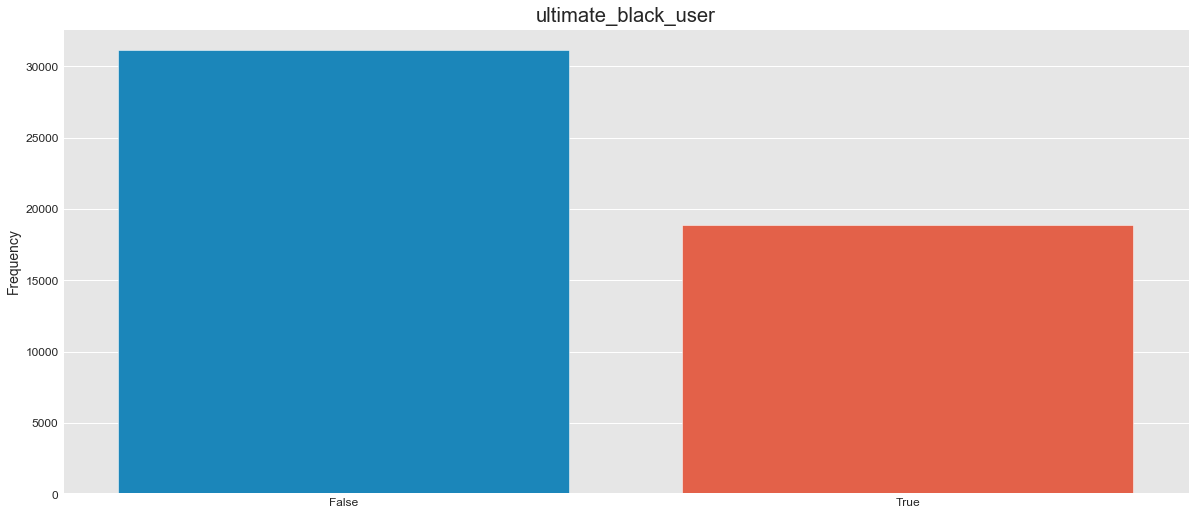

False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [277]:
categorical_features = ['city', 'phone', 'ultimate_black_user']
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [391]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [392]:
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

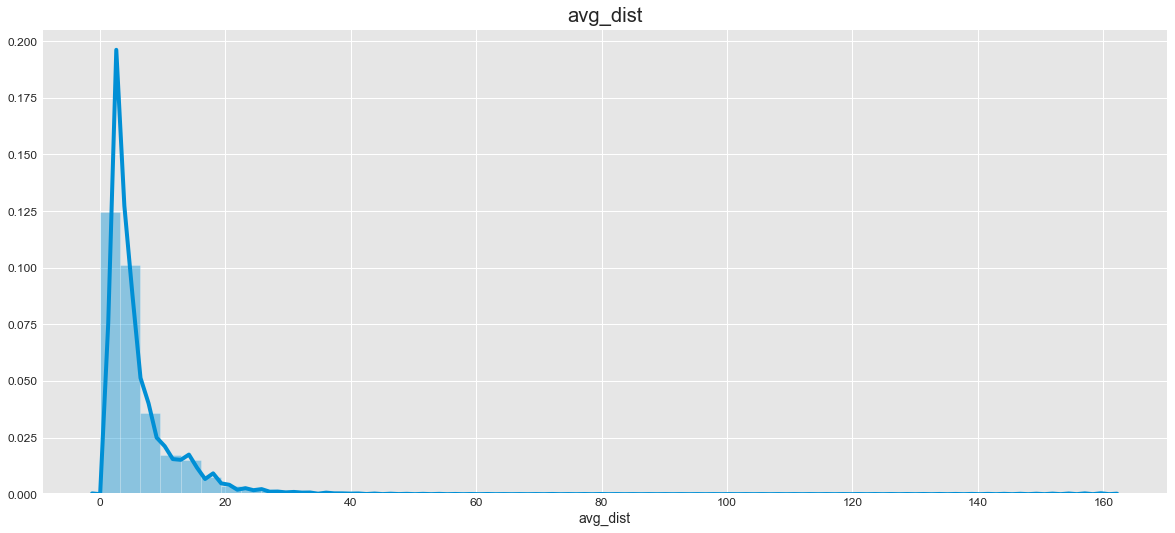

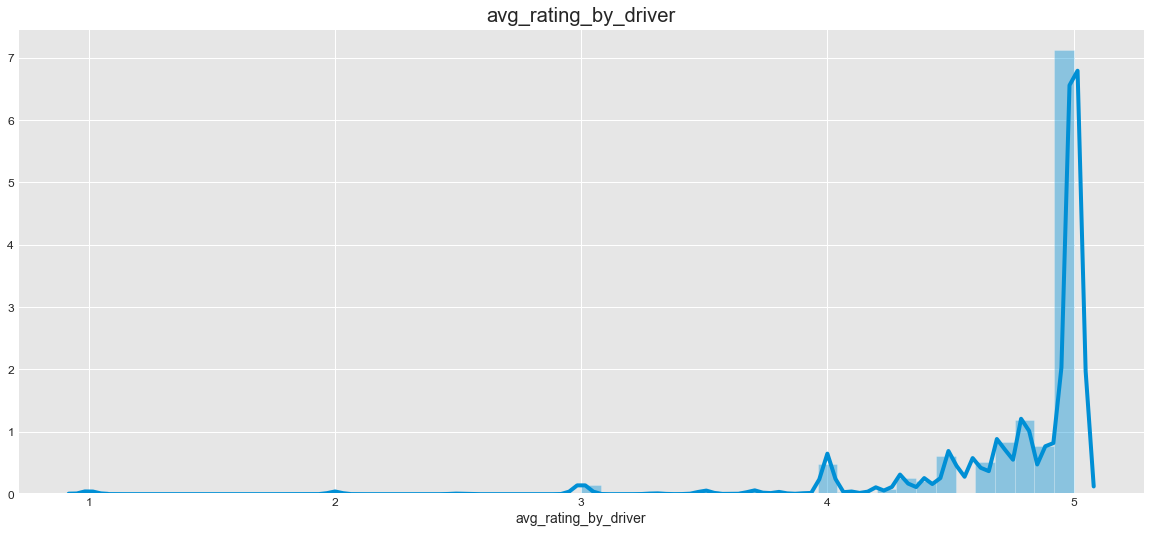

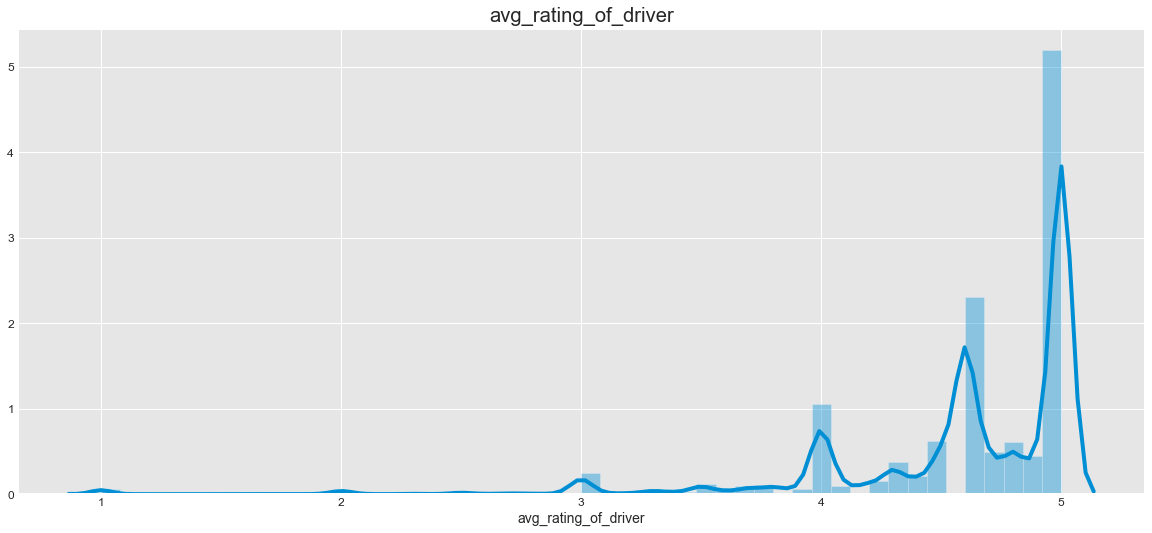

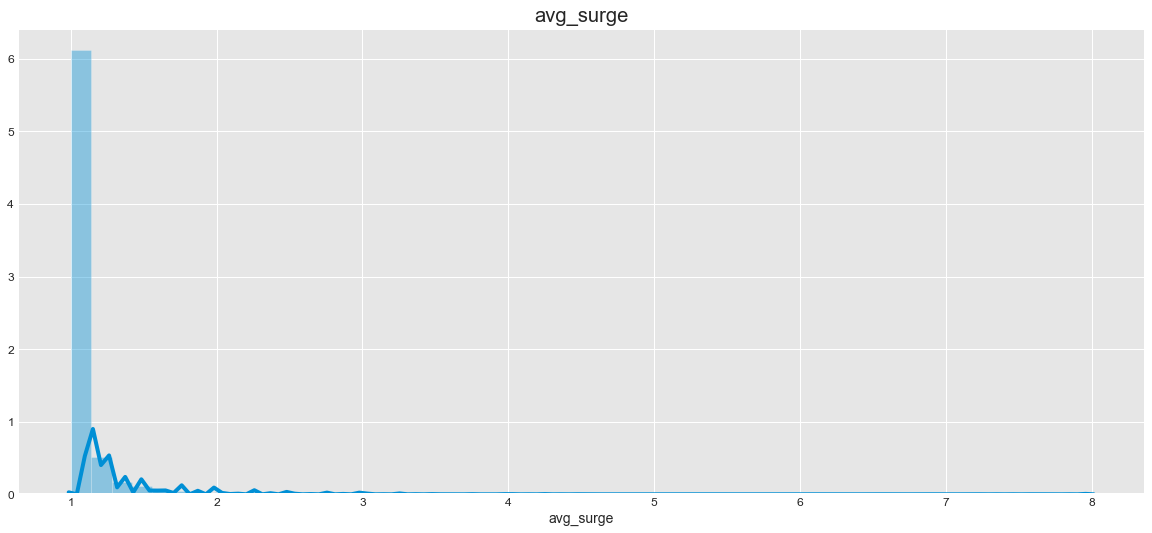

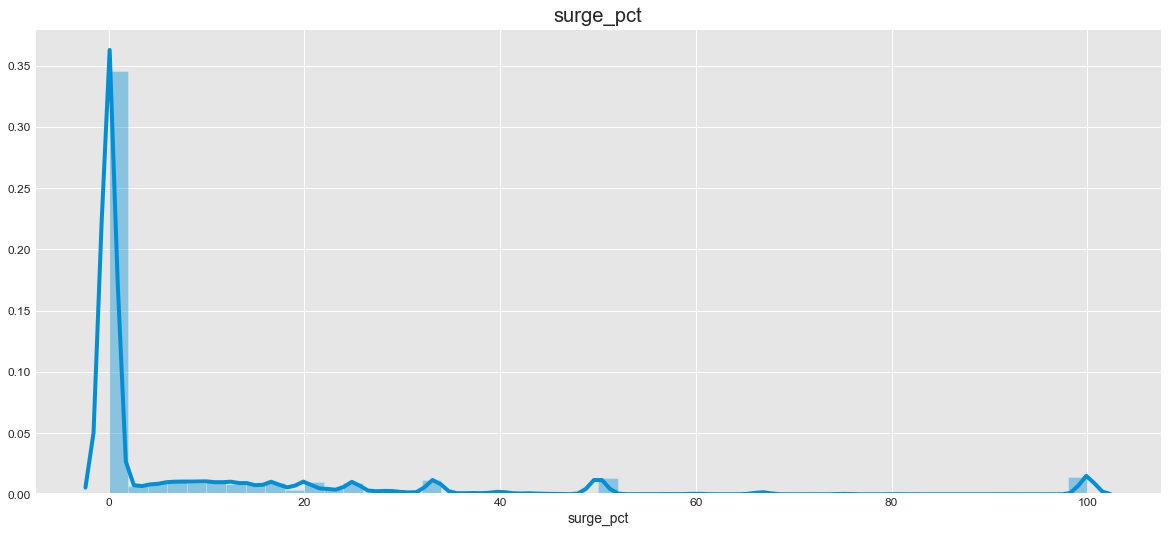

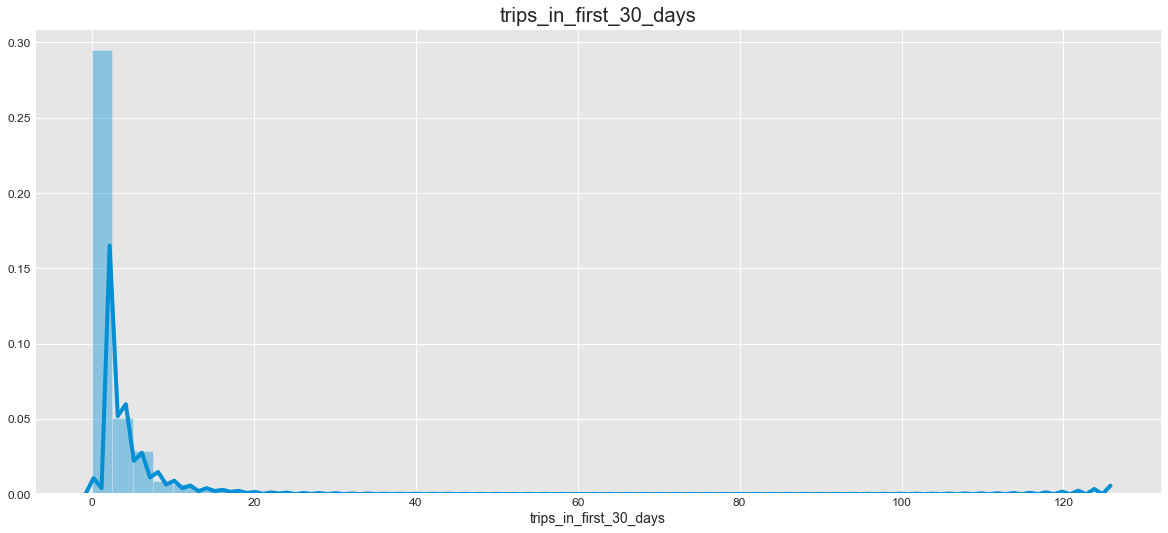

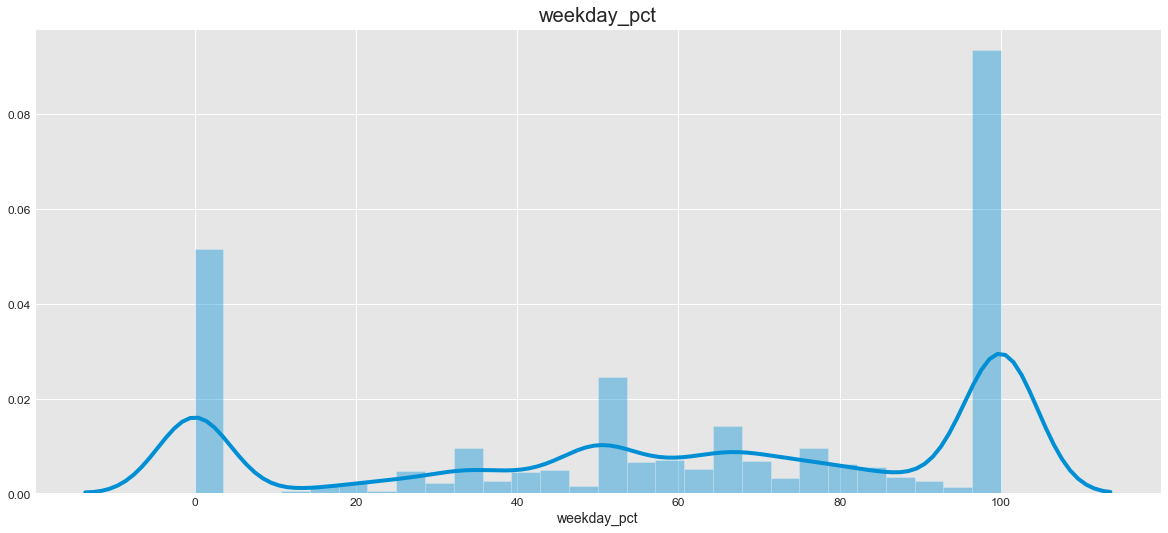

In [393]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

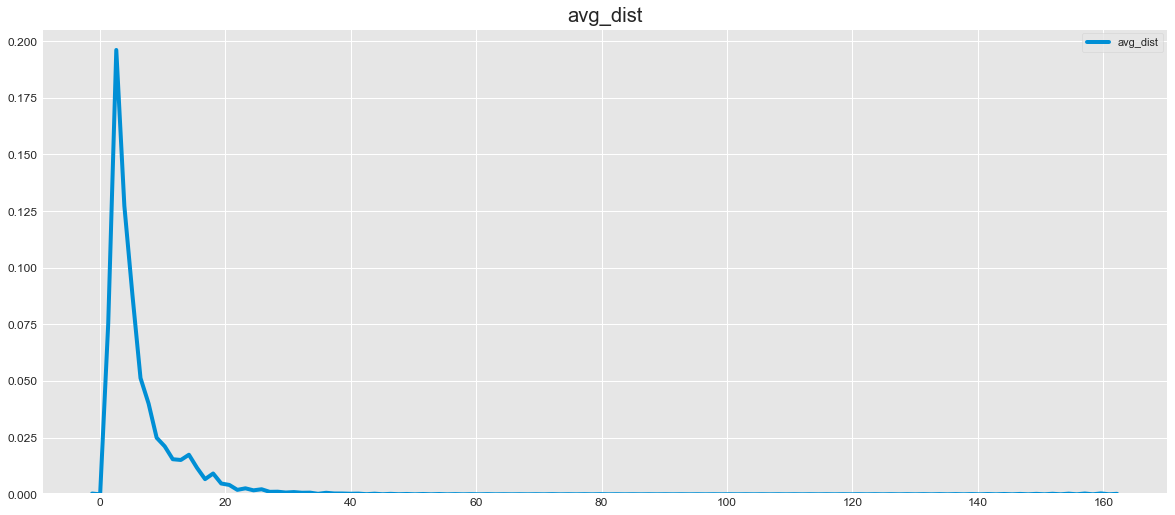

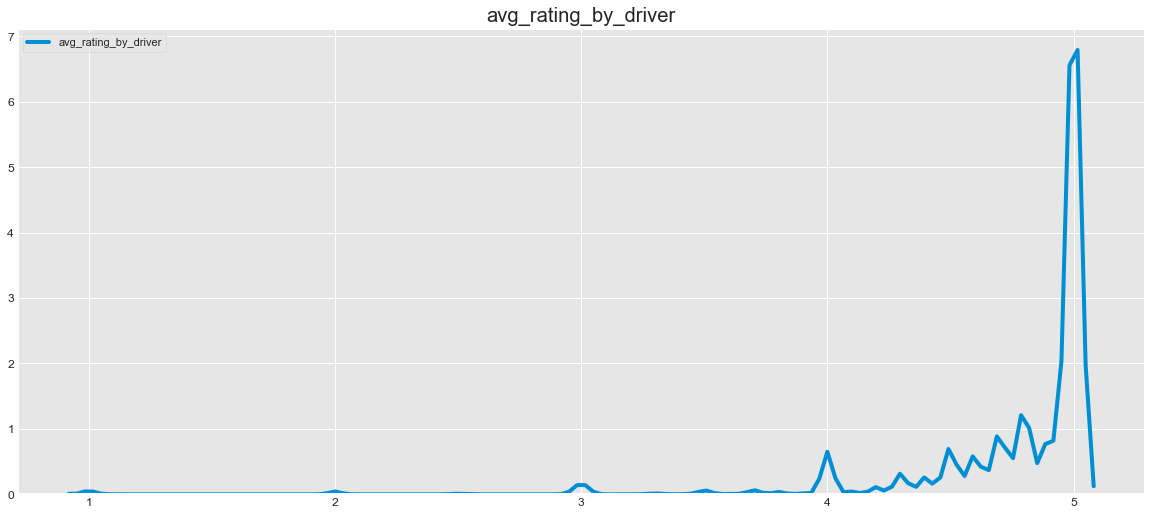

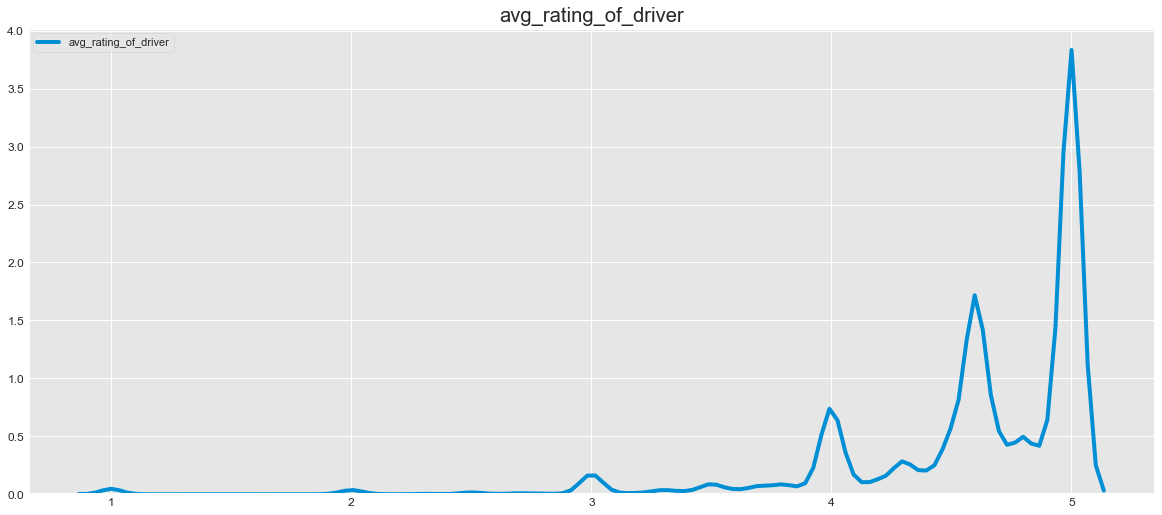

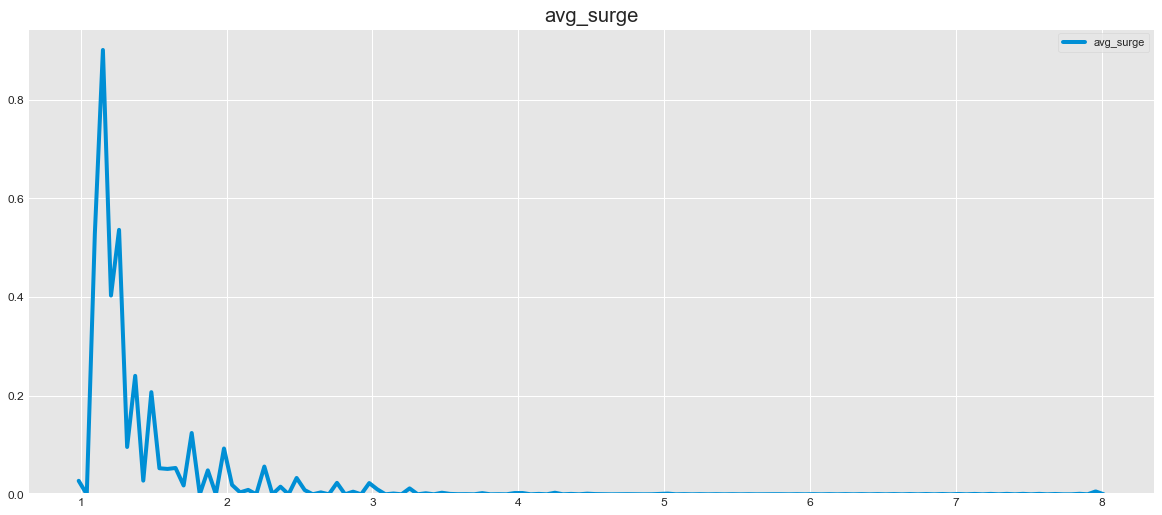

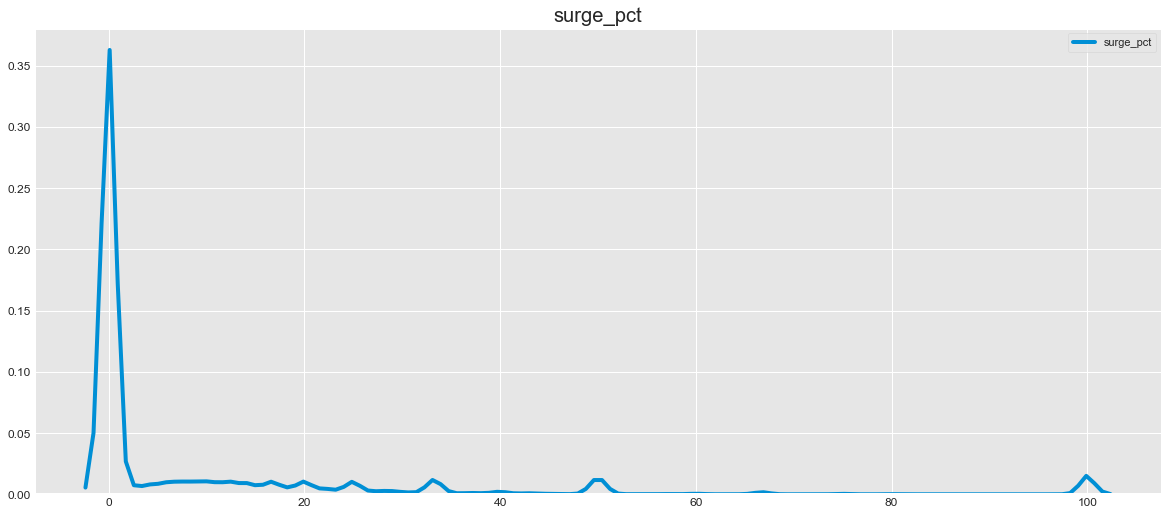

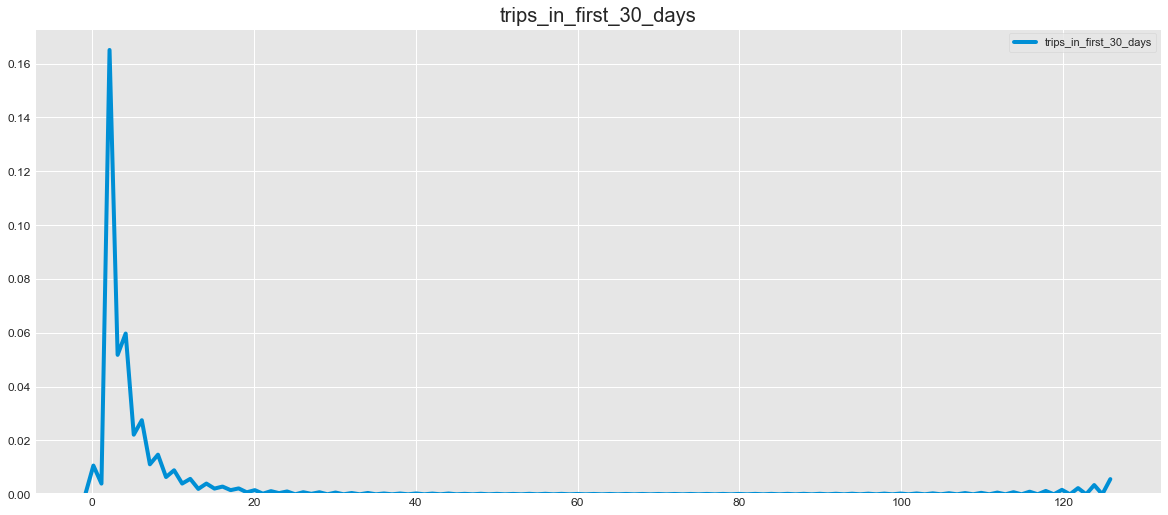

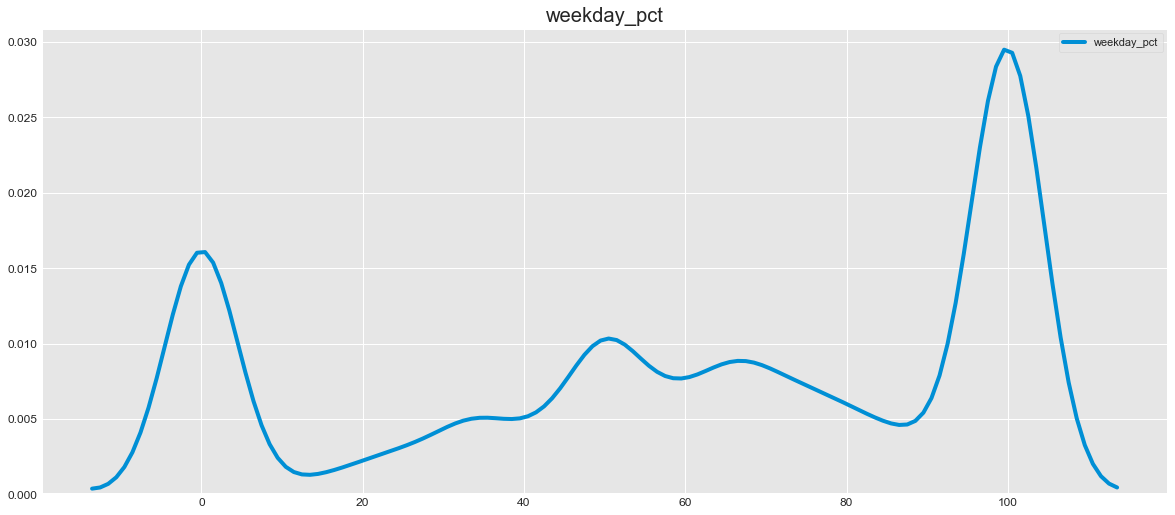

In [394]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

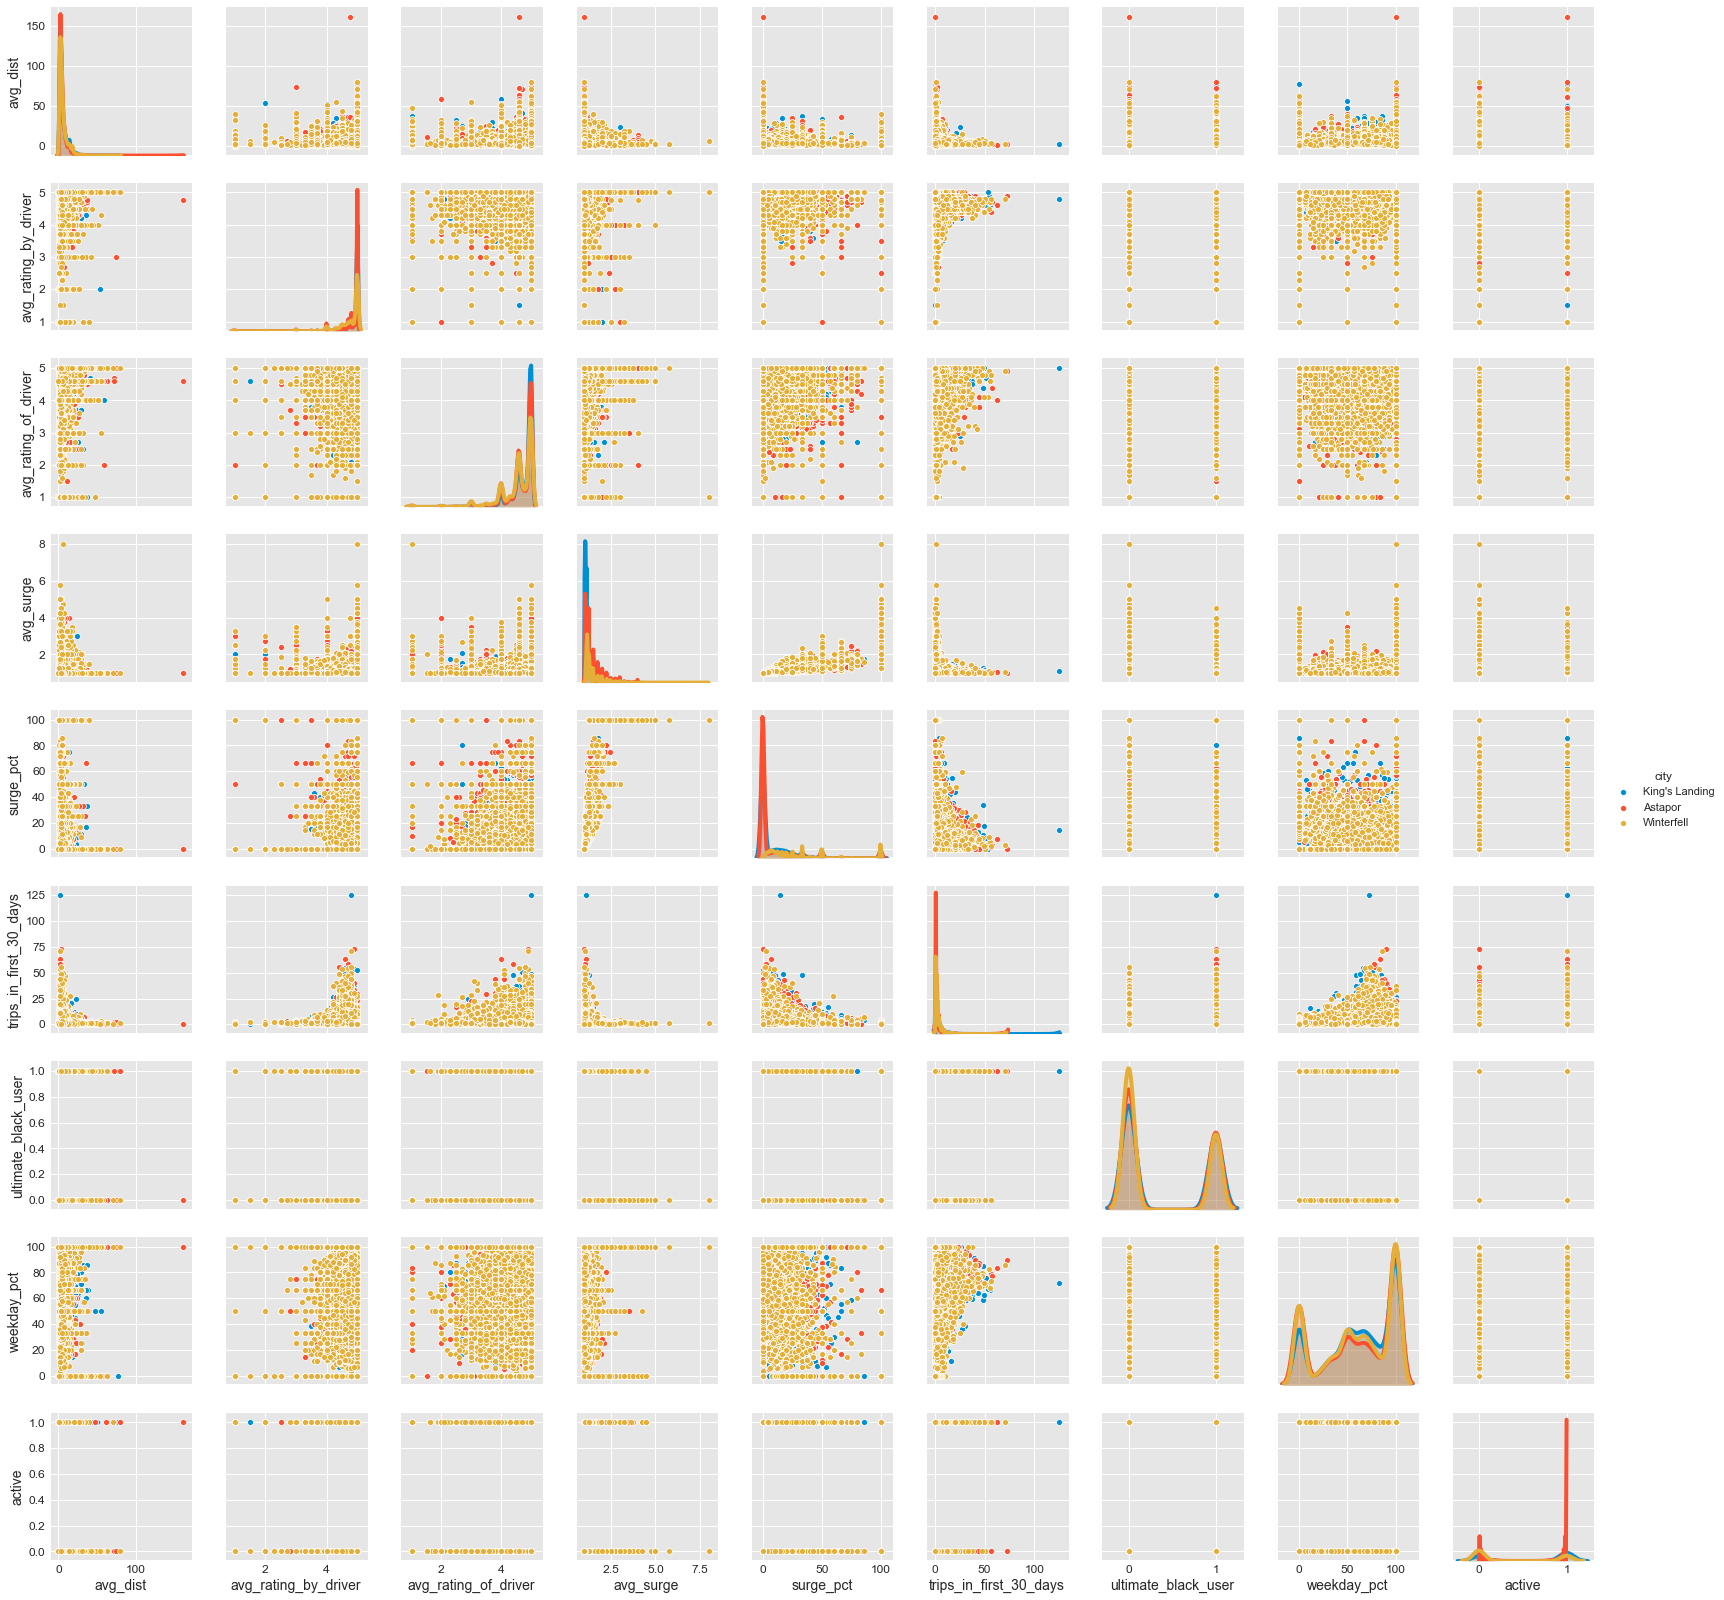

In [461]:
sns.pairplot(df, hue='city')

In [396]:
with open('ultimate_data_challenge.json') as ultimate_data_challenge:
    data = json.load(ultimate_data_challenge)
df = pd.DataFrame(data)

logins = pd.read_json('logins.json')

In [397]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [398]:
df['active'] =df.last_trip_date[df['last_trip_date'] > '2014-06-01'] 

In [399]:
df['active']= df.active.astype(str)

In [400]:
df.active[df.active=='nan'] = 0

In [401]:
df.active[df.active!=0] = 1

In [402]:
df.active.head()

0    1
1    0
2    0
3    1
4    0
Name: active, dtype: object

<h1> Modelling</h1>

In [403]:
df_model = df.copy()

In [404]:
df_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [405]:
#Cleaning Data 
df_model.head()
# Drop datetime features
df_model.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)


In [406]:
df_model.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'active'],
      dtype='object')

In [423]:
# Creating dummy variables for categorical features
data = pd.get_dummies(df_model, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [424]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,0,0


In [425]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
import time

In [433]:
X ,y = data.drop('active', axis=1),data.active
y = (y==1).astype(int)

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipeline = pl(steps)

# Parameters
param_grid = dict(model__C = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                  model__penalty = ['l1', 'l2'],
                  model__class_weight = ['balanced'])

# Setting up the grid search
LRcw = GridSearchCV(pipeline, param_grid = param_grid, 
                           verbose = 3,
                           cv = 5,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRcw.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jo

In [447]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
print("best params is : ",LRcw.best_params_)
print("best score is : ", LRcw.best_score_)

best params is :  {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}
best score is :  0.6600345683908703


In [448]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
print("best params is : ",LRcw.best_params_)
print("best score is : ", LRcw.best_score_)
y_pred_test = LRcw.predict(X_test)
y_pred_test_prob = LRcw.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

best params is :  {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}
best score is :  0.6600345683908703
#####################
Test data
#####################
F1:  0.6295442908346134
Cohen Kappa:  0.3908690743053248
Brier:  0.29170446527567784
LogLoss:  0.5755661995396002
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      6285
           1       0.59      0.68      0.63      3636

    accuracy                           0.71      9921
   macro avg       0.69      0.70      0.69      9921
weighted avg       0.72      0.71      0.71      9921



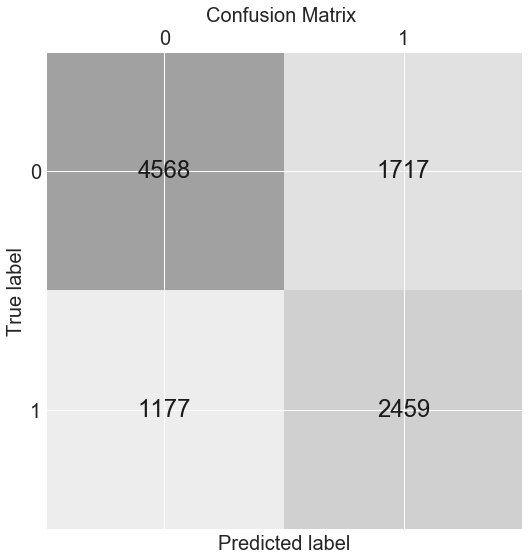

In [449]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

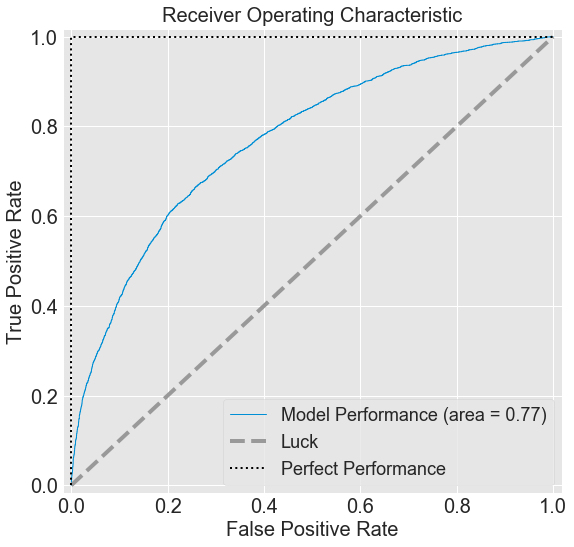

In [450]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
            [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)

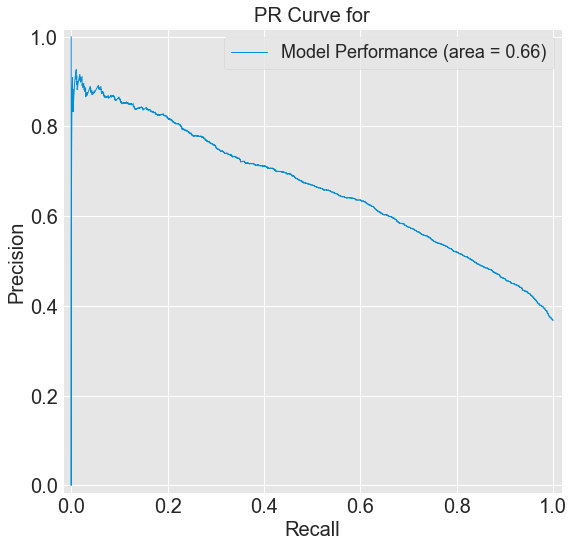

In [451]:
# PR curve
fig2, ax2 = plt.subplots(figsize=(8, 8))
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
#pr_auc = auc(prec, recall)
plt.plot(recall, prec, lw=1, label='Model Performance (area = %0.2f)' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])))    
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('Recall', size=20)
plt.ylabel('Precision', size=20)
plt.title('PR Curve for', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="top right", fontsize=18)

In [452]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state = 42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='average_precision',
                          iid=False)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [8

In [453]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [50],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [5, 10, 15]
                  #model__class_weight = ['balanced', {0:0.05, 1:0.95}, {0:0.1, 1:0.9}]
                  )
# For CV in grid search
cv = 2
# Setting up the grid search
RFrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 3,
                           cv = cv,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFrus.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    7.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.6s finished


CPU times: user 1.18 s, sys: 138 ms, total: 1.32 s
Wall time: 8.96 s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rus',
                                        RandomUnderSampler(random_state=30,
                                                           ratio=None,
                                                           replacement=False,
                                                           return_indices=False,
                                                           sampling_strategy='auto')),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
         

In [454]:
print("best params is : ",grid_search.best_params_)
print("best score is : ", grid_search.best_score_)

best params is :  {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 200}
best score is :  0.7777448718441136


In [455]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [456]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.3013 degrees.
Accuracy = -inf%.


In [457]:
y_pred_test = RFrus.predict(X_test)
y_pred_test_prob = RFrus.predict_proba(X_test)

In [458]:
y_pred_test = RFrus.predict(X_test)
#y_pred_test_prob = grid_search.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
#print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#####################
Test data
#####################
F1:  0.7150127226463103
Cohen Kappa:  0.529791842653226
Brier:  0.2257836911601653
              precision    recall  f1-score   support

           0       0.86      0.78      0.81      6285
           1       0.67      0.77      0.72      3636

    accuracy                           0.77      9921
   macro avg       0.76      0.77      0.76      9921
weighted avg       0.79      0.77      0.78      9921



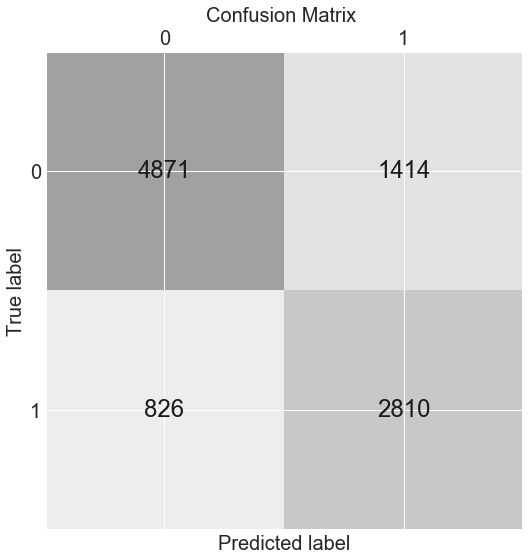

In [459]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

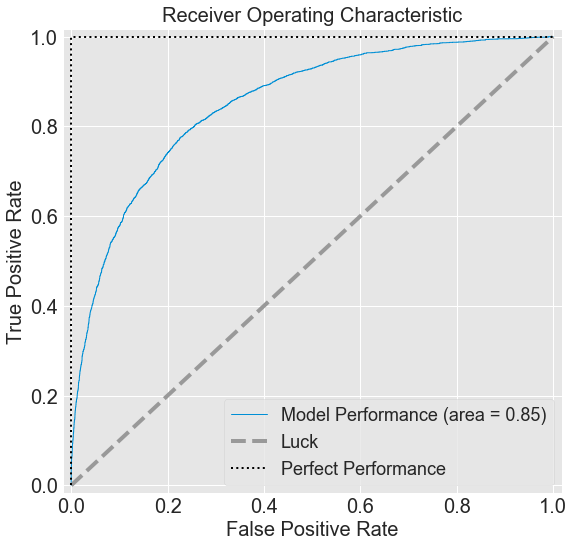

In [460]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
        [0, 1], 
        '--', 
        color=(0.6, 0.6, 0.6), 
        label='Luck')
    
plt.plot([0, 0, 1], 
        [0, 1, 1], 
        lw=2,
        linestyle=':',
        color='black',
        label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)

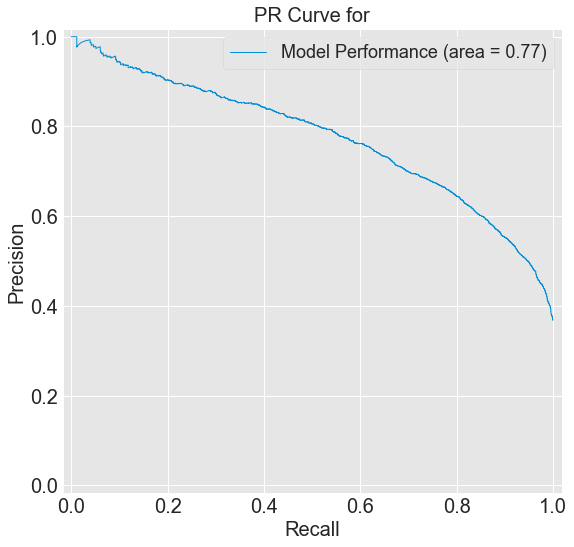

In [462]:
# PR curve
fig2, ax2 = plt.subplots(figsize=(8, 8))
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
#pr_auc = auc(prec, recall)
plt.plot(recall, prec, lw=1, label='Model Performance (area = %0.2f)' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])))    
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('Recall', size=20)
plt.ylabel('Precision', size=20)
plt.title('PR Curve for', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="top right", fontsize=18)